## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Load the dataset

In [47]:
df=pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [48]:
num_col=df.select_dtypes(include=['float64','int64']).columns.tolist()
print(num_col)

['total_bill', 'tip', 'size']


In [49]:
cat_col=df.select_dtypes(include=['object']).columns.tolist()
print(cat_col)

['sex', 'smoker', 'day', 'time']


### 2. Compute the average bill amount for each day.

In [50]:
avg_bill_amount=(df.groupby('day')['total_bill']).mean()
print(avg_bill_amount)

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64


### 3. Which gender is more generous in giving tips?

In [53]:
avg_tip_by_gender = df.groupby('sex')['tip'].mean()
print("Average tip amount by gender: ")
print(avg_tip_by_gender)
print("The gender that is generous: ")
avg_tip_by_gender.idxmax()

Average tip amount by gender: 
sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64
The gender that is generous: 


'Male'

### 4. According to the data, were there more customers for dinner or lunch?

In [55]:
customer_count_by_time = df['time'].value_counts()
print("Customer count by time:")
print(customer_count_by_time)
print("The time of the meal is")
customer_count_by_time.idxmax()

Customer count by time:
Dinner    176
Lunch      68
Name: time, dtype: int64
The time of the meal is


'Dinner'

### 5. Based on the statistical summary, comment on the variable 'tip'

In [10]:
print("Statistical summary of 'tip' variable:")
print(df['tip'].describe())

Statistical summary of 'tip' variable:
count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


### 6. Find the busiest day in terms of the orders?

In [56]:
busiest_day = df['day'].value_counts().idxmax()
print("Busiest day in terms of orders:", busiest_day)

Busiest day in terms of orders: Sat


### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

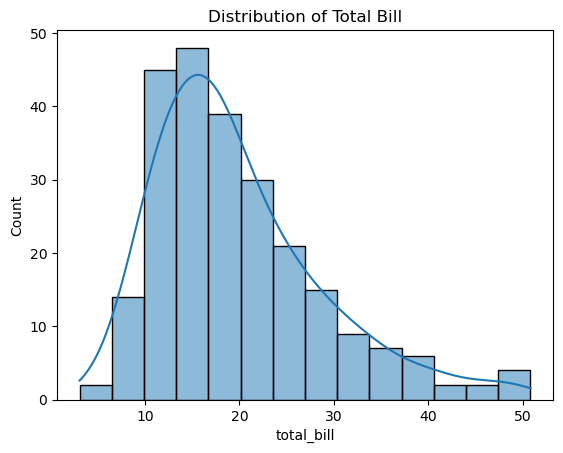

In [57]:
sns.histplot(df['total_bill'], kde=True)
plt.title('Distribution of Total Bill')
plt.show()

In [58]:
df['total_bill'].skew()

1.1332130376158205

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [62]:
# Calculate the correlation between 'total_bill' and 'tip'
correlation = df[['tip','total_bill']].corr()
print("Correlation between 'total_bill' and 'tip':")
correlation

Correlation between 'total_bill' and 'tip':


,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


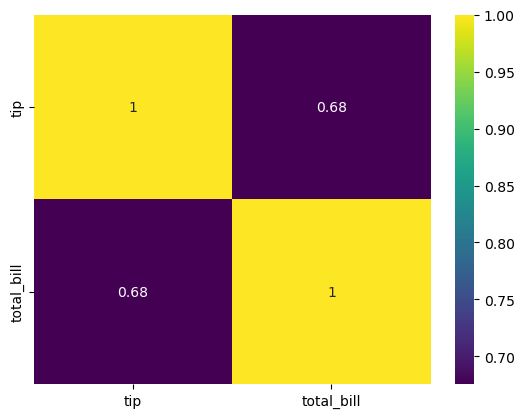

In [63]:
sns.heatmap(correlation,annot=True,cmap='viridis')
plt.show()

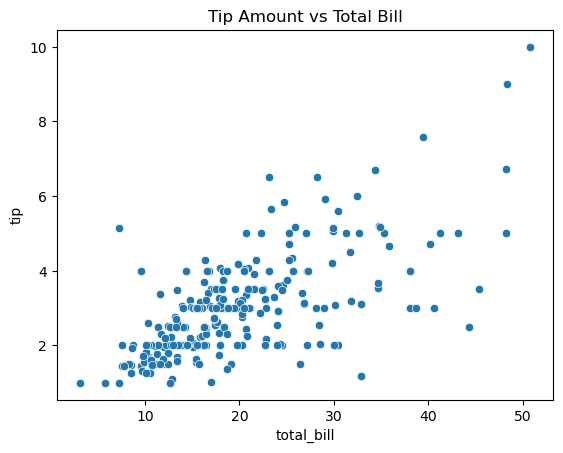

In [64]:
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.title('Tip Amount vs Total Bill')
plt.show()

### 9. What is the percentage of males and females in the dataset? and display it in the plot

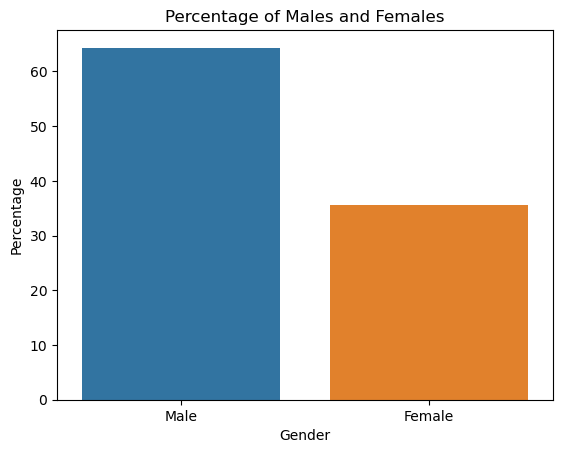

In [15]:
gender_percentage = df['sex'].value_counts(normalize=True) * 100
sns.barplot(x=gender_percentage.index, y=gender_percentage.values)
plt.title('Percentage of Males and Females')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [65]:
gender_smoker_count = df.groupby(['sex', 'smoker']).size().unstack()
gender_smoker_count


smoker,No,Yes
sex,,
Female,54,33
Male,97,60


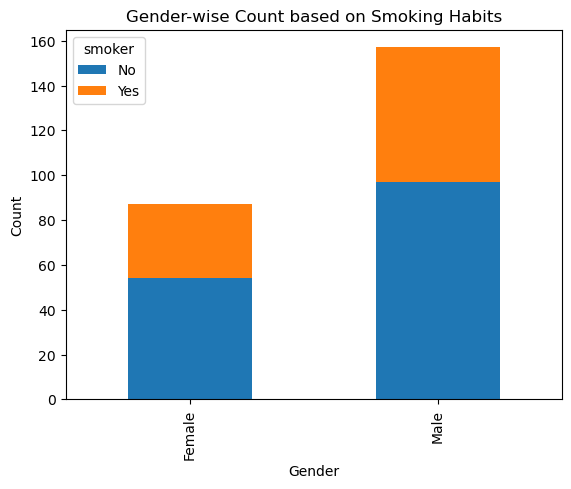

In [66]:
gender_smoker_count.plot(kind='bar', stacked=True)
plt.title('Gender-wise Count based on Smoking Habits')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

In [67]:
avg_tip_by_day = df.groupby('day')['tip'].mean()
avg_tip_by_day

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

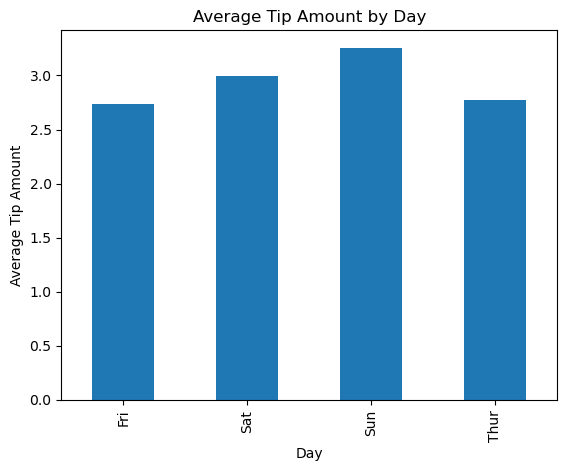

In [68]:
avg_tip_by_day.plot(kind='bar')
plt.title('Average Tip Amount by Day')
plt.xlabel('Day')
plt.ylabel('Average Tip Amount')
plt.show()

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

In [72]:
df[['size','total_bill']].corr()

,size,total_bill
size,1.000000,0.598315
total_bill,0.598315,1.000000


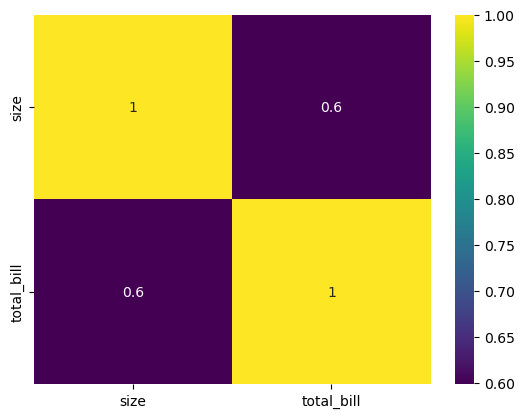

In [73]:
sns.heatmap(df[['size','total_bill']].corr(),annot=True,cmap='viridis')
plt.show()

<Axes: xlabel='size'>

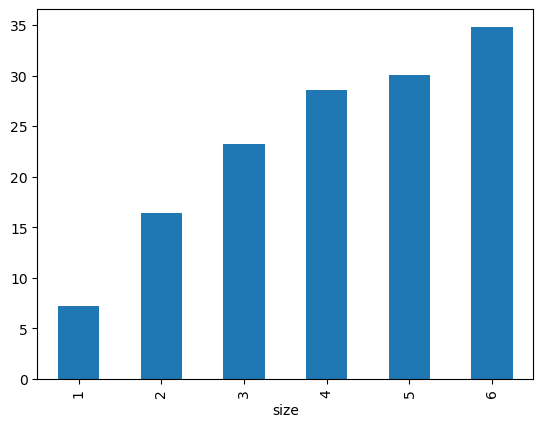

In [71]:
df.groupby('size')['total_bill'].mean().plot(kind='bar')

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

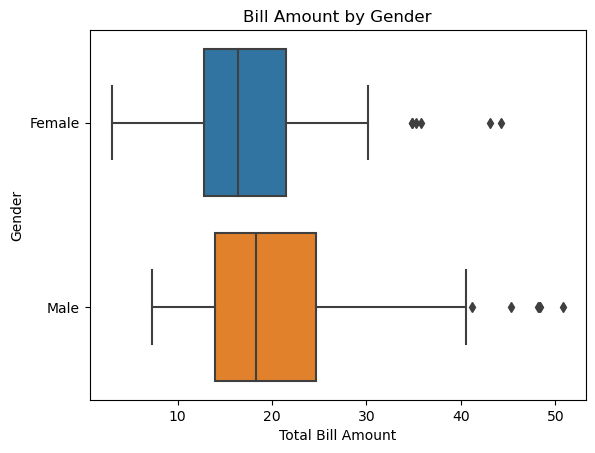

In [74]:
sns.boxplot(data=df, y='sex', x='total_bill', orient='h')
plt.title('Bill Amount by Gender')
plt.ylabel('Gender')
plt.xlabel('Total Bill Amount')
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [77]:
max_bill_lunch_saturday_sunday = df[(df['day'].isin(['Sat', 'Sun'])) & (df['time'] == 'Lunch')]['total_bill'].max()
max_bill_dinner_saturday_sunday = df[(df['day'].isin(['Sat', 'Sun'])) & (df['time'] == 'Dinner')]['total_bill'].max()
print("Maximum bill amount for lunch on Saturday and Sunday:", max_bill_lunch_saturday_sunday)
print("Maximum bill amount for dinner on Saturday and Sunday:", max_bill_dinner_saturday_sunday)

Maximum bill amount for lunch on Saturday and Sunday: nan
Maximum bill amount for dinner on Saturday and Sunday: 50.81


### 15. Compute the percentage of missing values in the dataset.

In [78]:
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values in the dataset:")
print(missing_percentage)

Percentage of missing values in the dataset:
total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64


### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [79]:
duplicate_count = df.duplicated().sum()
print("Count of duplicate records:", duplicate_count)
df.drop_duplicates(inplace=True)

Count of duplicate records: 1


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

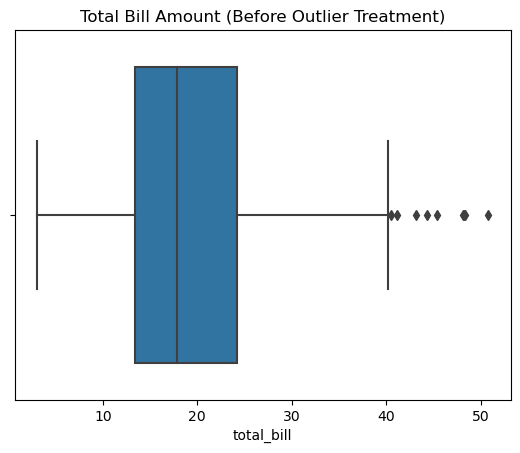

In [81]:
sns.boxplot(data=df, x='total_bill')
plt.title('Total Bill Amount (Before Outlier Treatment)')
plt.show()

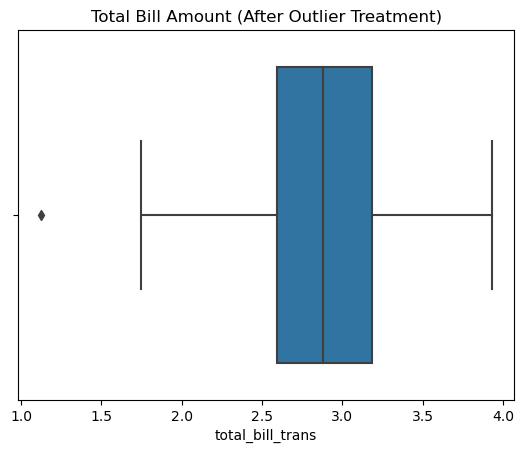

In [84]:
from scipy.stats import zscore
df['total_bill_trans']=np.log(df['total_bill'])
plt.title('Total Bill Amount (After Outlier Treatment)')
sns.boxplot(x=df['total_bill_trans'])
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

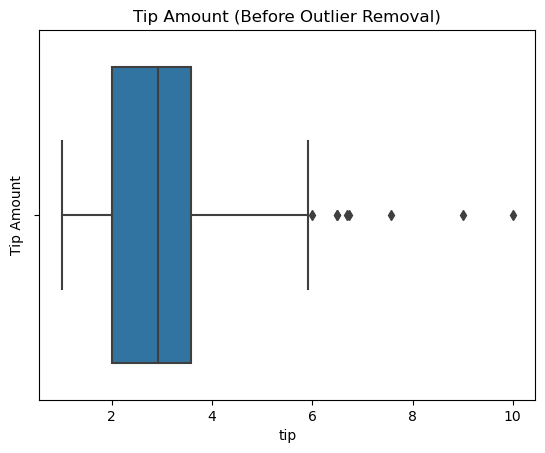

In [85]:
sns.boxplot(data=df, x='tip')
plt.title('Tip Amount (Before Outlier Removal)')
plt.ylabel('Tip Amount')
plt.show()

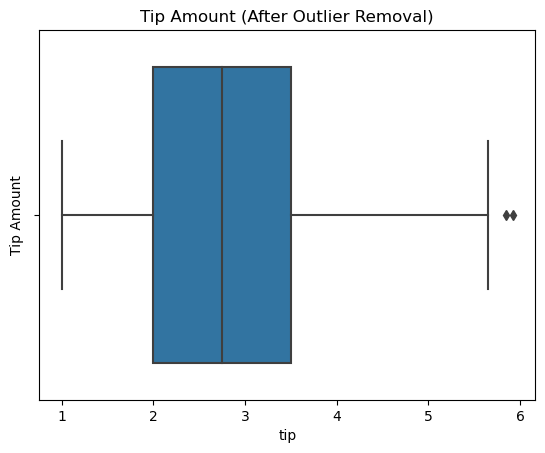

In [86]:
# Outlier removal using IQR technique
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

df = df[(df['tip'] >= lower_bound) & (df['tip'] <= upper_bound)]

sns.boxplot(data=df, x='tip')
plt.title('Tip Amount (After Outlier Removal)')
plt.ylabel('Tip Amount')
plt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [88]:
df=pd.get_dummies(df,drop_first=True)
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size,total_bill_winsorized,total_bill_trans
192,28.44,2.56,1,1,3,1,2,28.44,3.347797
38,18.69,2.31,1,0,1,0,3,18.69,2.927989
185,20.69,5.00,1,0,2,0,5,20.69,3.029650
28,21.70,4.30,1,0,1,0,2,21.70,3.077312
112,38.07,4.00,1,0,2,0,3,38.07,3.639427


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [90]:
total_bill_range = df['total_bill'].max() - df['total_bill'].min()
total_bill_range

45.1

In [92]:
df['total_bill_normalized'] = (df['total_bill'] - df['total_bill'].min()) / total_bill_range
total_bill_norm_range=df['total_bill_normalized'].max() - df['total_bill_normalized'].min()
total_bill_norm_range

1.0

### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [94]:
tips_df = pd.read_csv('tips.csv')
tips_df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [97]:
tips_df=pd.get_dummies(tips_df,drop_first=True)
tips_df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3


In [98]:
# Split the dataset into X and y
X = tips_df.drop('tip', axis=1)
y = tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)
scaler = MinMaxScaler()
X_train[['total_bill', 'size']] = scaler.fit_transform(X_train[['total_bill', 'size']])
X_test[['total_bill', 'size']] = scaler.transform(X_test[['total_bill', 'size']])

(170, 6) (74, 6)
(170,) (74,)


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [100]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

y_pred = linear_regression.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared value:", r2)

R-squared value: 0.29114265145468066


### Happy Learning:)